In [1]:
# Importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import warnings

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# Load file names for images with masks
with_mask_path = r"C:\Users\Swapnil Alaspure\Documents\Project\Face Mask Detection Dataset\data\with_mask"
with_mask_files = os.listdir(with_mask_path)

# Display some file names
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [4]:
# Load file names for images without masks
without_mask_path = r"C:\Users\Swapnil Alaspure\Documents\Project\Face Mask Detection Dataset\data\without_mask"
without_mask_files = os.listdir(without_mask_path)

# Display some file names
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [5]:
# Display the number of images with and without masks
print('Number of images with masks:', len(with_mask_files))
print('Number of images without masks:', len(without_mask_files))

Number of images with masks: 3725
Number of images without masks: 3828


In [6]:
# Creating labels for the two classes of images
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

In [7]:
# Display the total number of labels
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [8]:
# Combine labels for both classes
labels = with_mask_labels + without_mask_labels

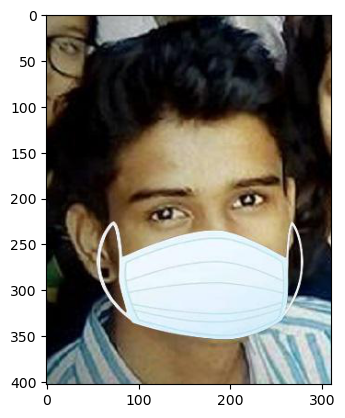

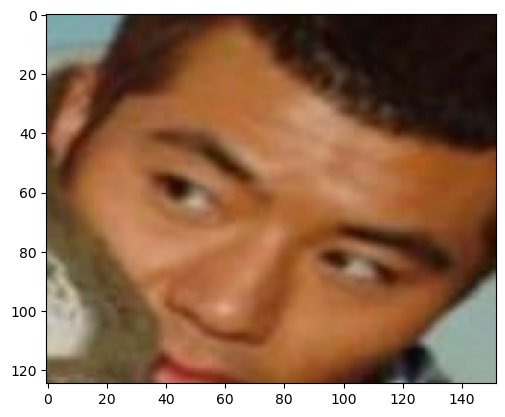

In [9]:
# Displaying sample images with and without masks
img_with_mask = mpimg.imread(os.path.join(with_mask_path, with_mask_files[3]))
plt.imshow(img_with_mask)
plt.show()

img_without_mask = mpimg.imread(os.path.join(without_mask_path, without_mask_files[4]))
plt.imshow(img_without_mask)
plt.show()

In [10]:
# Image Processing
# Resize the images and convert them to numpy arrays
def process_images(image_files, image_path):
    data = []
    for img_file in image_files:
        img_path = os.path.join(image_path, img_file)
        image = Image.open(img_path).resize((128, 128)).convert('RGB')
        image = np.array(image)
        data.append(image)

    return data

with_mask_data = process_images(with_mask_files, with_mask_path)
without_mask_data = process_images(without_mask_files, without_mask_path)

In [11]:
# Display information about the processed images
print(type(with_mask_data))
print(with_mask_data[0])
print(with_mask_data[0].shape)

<class 'list'>
[[[50 58 31]
  [46 54 34]
  [56 59 42]
  ...
  [26 32 25]
  [29 33 18]
  [34 40 16]]

 [[47 55 30]
  [49 57 37]
  [59 63 40]
  ...
  [18 21 11]
  [38 42 31]
  [31 41 22]]

 [[52 58 37]
  [50 59 38]
  [59 64 36]
  ...
  [45 44 30]
  [29 35 28]
  [20 30 17]]

 ...

 [[63 72 37]
  [66 76 41]
  [74 84 50]
  ...
  [ 5  4  0]
  [20 19 15]
  [17 17 12]]

 [[59 71 34]
  [60 70 39]
  [68 76 50]
  ...
  [16 15 12]
  [15 13 10]
  [13  9  7]]

 [[53 69 29]
  [54 64 37]
  [57 63 43]
  ...
  [18 18 16]
  [16 13 12]
  [20 12 13]]]
(128, 128, 3)


In [12]:
# Convert image list and label list to numpy arrays
X = np.array(with_mask_data + without_mask_data)
Y = np.array(labels)

In [13]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
# Scale the data
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [15]:
from tensorflow import keras

# Assuming input shape is (128, 128, 3)
input_shape = (128, 128, 3)
num_of_classes = 2

# Creating a sequential model
model = keras.Sequential([
    # Layer No (Input Layer): 01
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Layer No: 02
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Layer No: 03
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten before dense layers
    keras.layers.Flatten(),

    # Layer No: 04
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    # Layer No: 05
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),

    # Layer No (Out-Put): 06
    keras.layers.Dense(num_of_classes, activation='sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [16]:
# Compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [17]:
# Train the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=7)

Epoch 1/7
170/170 [==============================] - 200s 1s/step - loss: 0.4724 - acc: 0.7563 - val_loss: 0.2474 - val_acc: 0.9025
Epoch 2/7
170/170 [==============================] - 177s 1s/step - loss: 0.2837 - acc: 0.8871 - val_loss: 0.2121 - val_acc: 0.9289
Epoch 3/7
170/170 [==============================] - 176s 1s/step - loss: 0.2413 - acc: 0.9117 - val_loss: 0.1817 - val_acc: 0.9372
Epoch 4/7
170/170 [==============================] - 173s 1s/step - loss: 0.1924 - acc: 0.9290 - val_loss: 0.2139 - val_acc: 0.9256
Epoch 5/7
170/170 [==============================] - 172s 1s/step - loss: 0.1841 - acc: 0.9336 - val_loss: 0.2040 - val_acc: 0.9372
Epoch 6/7
170/170 [==============================] - 173s 1s/step - loss: 0.1548 - acc: 0.9448 - val_loss: 0.1851 - val_acc: 0.9570
Epoch 7/7
170/170 [==============================] - 175s 1s/step - loss: 0.1322 - acc: 0.9542 - val_loss: 0.1461 - val_acc: 0.9504


In [18]:
# Model evaluation
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 210ms/step - loss: 0.1340 - acc: 0.9490
Test Accuracy = 0.9490403532981873


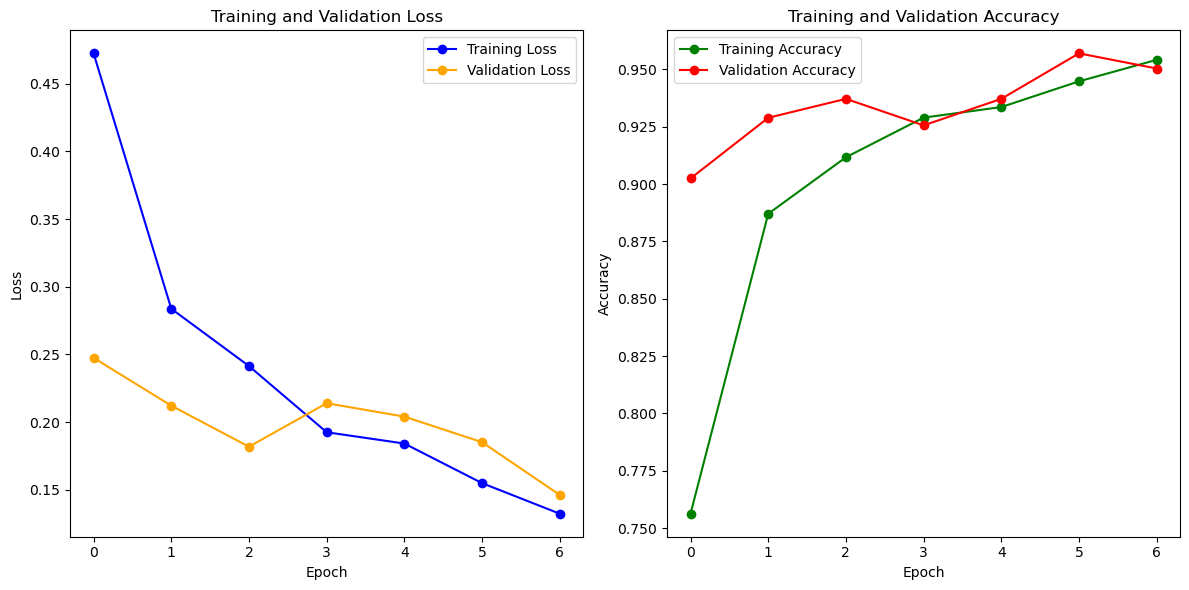

In [19]:
# Plotting Loss and Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy', color='green', marker='o')
plt.plot(history.history['val_acc'], label='Validation Accuracy', color='red', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Path of the image to be predicted: C:\Users\Swapnil Alaspure\Documents\Project\Face Mask Detection Dataset\No Mask-612x612.jpg


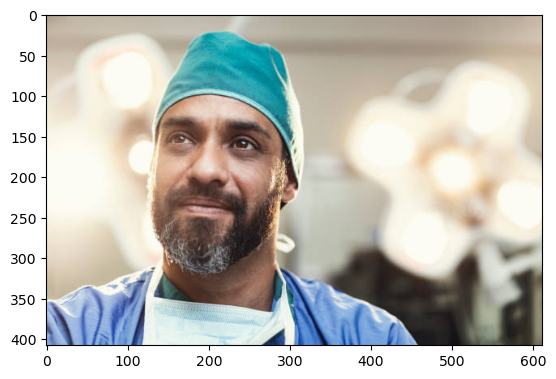

1/1 [==============================] - 0s 25ms/step
The person in the image is not wearing a mask


In [21]:
# Function to predict whether a person is wearing a mask or not
import cv2

# Path of the image to be predicted
input_image_path = input('Path of the image to be predicted: ')

# Attempt to read the input image
try:
    input_image = cv2.imread(input_image_path)

    # Check if the image is loaded successfully
    if input_image is None:
        print("Error: Unable to load the image.")
    else:
        # Display the input image
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        plt.show()

        # Resize and scale the input image
        input_image_resized = cv2.resize(input_image, (128, 128)) / 255.0
        input_image_reshaped = np.reshape(input_image_resized, [1, 128, 128, 3])

        # Predict using the model
        input_prediction = model.predict(input_image_reshaped)

        # Identify the predicted label
        input_pred_label = np.argmax(input_prediction)

        # Display the prediction result
        if input_pred_label == 0:
            print('The person in the image is wearing a mask')
        else:
            print('The person in the image is not wearing a mask')

except Exception as e:
    print(f"Error: {e}")